In [1]:
from scipy import io

In [2]:
data = io.loadmat('../data/loudspeaker_cube_driver_1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'R', 'azimuth', 'colatitude', 'fs', 'irs', 'order'])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

w = 12 / 1.1
h = w * (3 / 10)
ASPECT1 = (w, h)  # w, h in inches              ----- normal size
ASPECT2 = (w, h * 2)  # w, h in inches          ----- double hight
ASPECT3 = (w, h *10 /3)  # w, h in inches       ----- square plot
ASPECT05 = (w/2, h)  # w, h in inches           ----- two pictures side by side
ASPECT06 = (w/2, h*1.2)

ASPECT4 = (w*0.8, h *10 /3)

font_size = 12

# 设置全局默认字体大小
plt.rcParams['font.size'] = font_size


In [5]:
irs = data["irs"]
irs.shape

(1024, 648)

In [6]:
import sys
import os
current_dir = os.path.abspath('')  # 获取当前目录的绝对路径
parent_dir = os.path.dirname(current_dir)  # 获取父目录
sys.path.append(parent_dir)  # 添加父目录到 Python 路径

from auto_plot import *

print("Current directory:", current_dir)
print("Parent directory:", parent_dir)

%load_ext autoreload
%aimport source, vis, pinn
%autoreload 1
%aimport

import source, auto_plot, vis, pinn

Current directory: d:\Git\PINN-LiDAR\scripts
Parent directory: d:\Git\PINN-LiDAR


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Modules to reload:
pinn source vis

Modules to skip:




Current parameters:
c: 343
omega: 31415.926535897932
k: 91.59162255363829
amp: 1.0
loc: [0, 0, 0]
t: 0
freq: 5000

Current parameters:
c: 343
omega: 31415.926535897932
k: 91.59162255363829
amp: 1.0
loc: [0, 0, 0]
t: 0
freq: 5000
radius: 0.5


<Figure size 400x500 with 0 Axes>

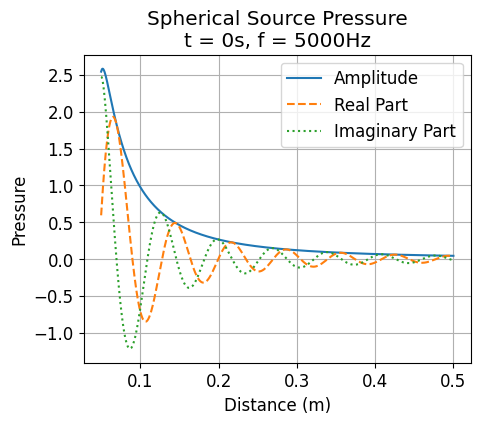

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from source import create_source
from vis import Avis

# Define basic parameters
params = {
    'c': 343,      # Speed of sound in m/s
    'amp': 1.0,
    'loc': [0, 0, 0],  # Source at origin
    't': 0,         # Time in 
    'freq': 5000
}

# Create source instances using factory function
spherical = create_source('spherical', **params)

# # Update specific parameters for each source type
spherical.update_params(radius=0.5)

# Create observation points along a line
x = np.linspace(0.05, 0.5, 1000)
obs_points = np.column_stack((x, np.zeros_like(x), np.zeros_like(x)))

# Calculate pressure
pressure = spherical.compute_pressure(
    obs=obs_points,
    radius=0.05
)

# Plot 1D pressure in new figure
plt.figure(figsize=(4, 5))
Avis.plot_pressure_1d(
    x=x,
    pressure=pressure,
    title=f"Spherical Source Pressure\nt = {spherical.params['t']}s, f = {spherical.freq}Hz"
)

plt.show()


Current parameters:
c: 343
omega: 31415.926535897932
k: 91.59162255363829
amp: 1.0
loc: [0, 0, 0]
t: 0
freq: 5000
radius: 0.5


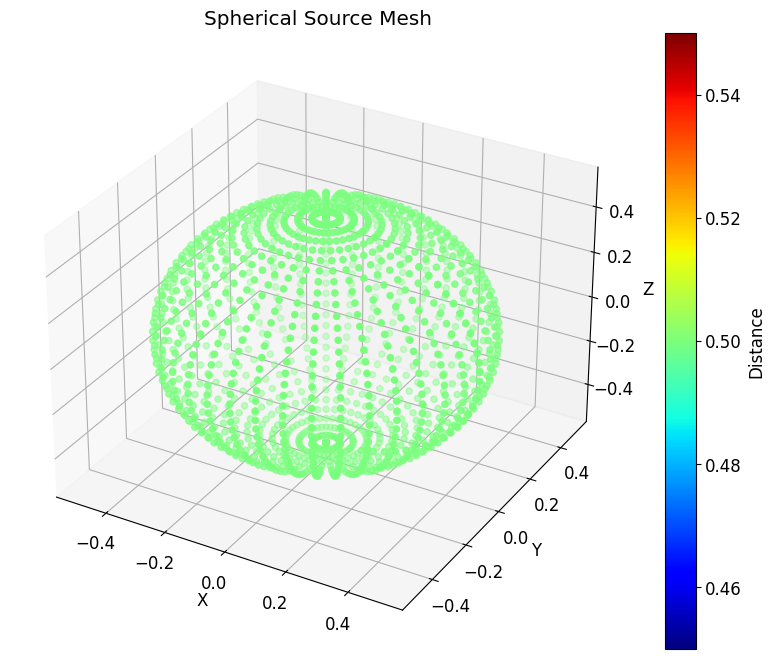

In [8]:

# Plot source mesh in 3D

spherical.update_params()
points, distances = spherical.source_mesh()
Avis.plot_source_mesh(points, distances, "Spherical Source Mesh")



Calculating frequency response with parameters:
Observation point: [1 4 3]
Additional parameters: {}


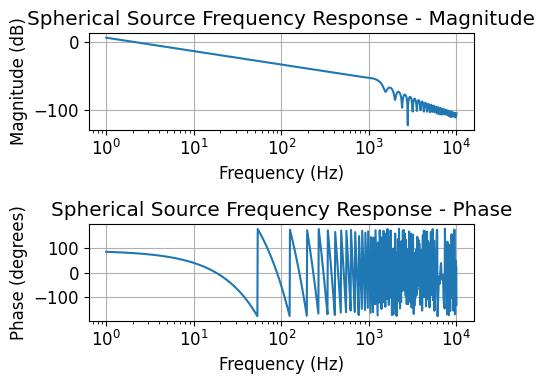

In [9]:
import numpy as np
from source import create_source
from vis import Avis

# Define frequency array (logarithmic spacing)
freqs = np.logspace(0, 4, 1000)  # 10 Hz to 10 kHz

# Define observation point
obs_point = np.array([1, 4, 3])

# Calculate frequency response
fr = spherical.calculate_frequency_response(
    freqs=freqs,
    obs_point=obs_point
)

# Plot frequency response using Avis
Avis.plot_frequency_response(
    freqs=freqs,
    fr=fr,
    title="Spherical Source Frequency Response"
)


Calculating directivity pattern with parameters:
Observation radius: 8.0
Additional parameters: {'amp': 1.0, 'radius': 0.5, 'max_order': 20, 'obs': array([[ 8.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.99877476e+00,  0.00000000e+00,  1.40008123e-01],
       [ 7.99509943e+00,  0.00000000e+00,  2.79973361e-01],
       ...,
       [ 7.99509943e+00,  0.00000000e+00, -2.79973361e-01],
       [ 7.99877476e+00,  0.00000000e+00, -1.40008123e-01],
       [ 8.00000000e+00,  0.00000000e+00, -1.95943488e-15]])}


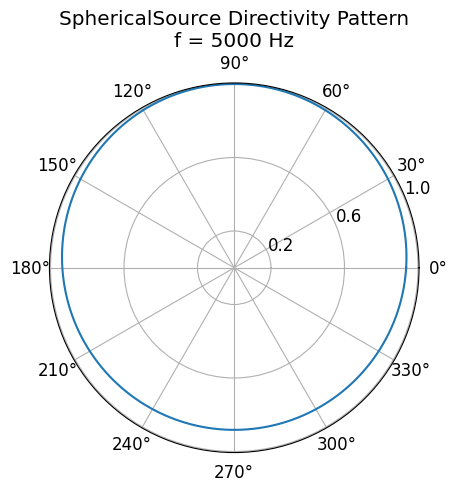

In [10]:

# 对于球形声源
spherical.freq = 300

spherical.plot_directivity_pattern(
    observation_radius=8.0,  # 更大的观察距离
    amp=1.0,
    radius= 0.5,
    max_order = 20
)

In [ ]:
spherical.freq = 400

grid_params = {
    'grid_size': 500,
    'x_range': (-2, 2),
    'y_range': (-2, 2)
}

spherical.update_params(radius = 0.5, max_order = 10)

Avis.create_heat_map(spherical, grid_params, t = 2)

NameError: name 'spherical' is not defined


Current parameters:
c: 343
omega: 2513.2741228718346
k: 7.327329804291063
freq: 400
radius: 0.5
amp: 1.0
loc: [0, 0, 0]
t: 0
max_order: 10
显示原始声场...

Generating heat map for Original Sound Field
Current parameters: {'c': 343, 'omega': 2513.2741228718346, 'k': 7.327329804291063, 'freq': 400, 'radius': 0.5, 'amp': 1.0, 'loc': [0, 0, 0], 't': 0, 'max_order': 10}

Current parameters:
c: 343
omega: 2513.2741228718346
k: 7.327329804291063
freq: 400
radius: 0.5
amp: 1.0
loc: [0, 0, 0]
t: 0
max_order: 10
Using device: cpu
第一个采样点位置: [-0.59261122 -1.86431962]
测量值: 0.0000
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


d:\Git\PINN-LiDAR\scripts\vis.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  full_pressure[mask] = pressure


Reusing TensorBoard on port 6010 (pid 6644), started 0:01:06 ago. (Use '!kill 6644' to kill it.)

Compiling model...
'compile' took 0.000428 s

Training model...

0         [9.67e-01]    [7.23e-01]    []  
1000      [1.56e-06]    [8.45e-07]    []  
2000      [4.48e-06]    [4.18e-06]    []  
3000      [4.01e-04]    [4.06e-04]    []  
4000      [3.71e-07]    [2.12e-07]    []  
5000      [1.68e-07]    [1.07e-07]    []  
6000      [5.40e-08]    [3.16e-08]    []  


KeyboardInterrupt: 

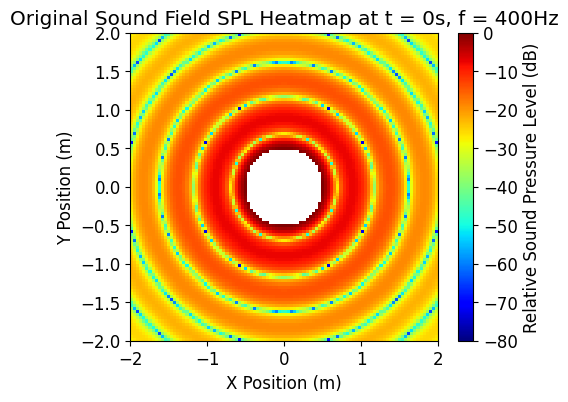

In [14]:
# %% [markdown]
# # 声场重建 PINN 演示
# 使用 PINN 从有限的测量点重建声场

# %%
# 导入必要的库

import numpy as np
import matplotlib.pyplot as plt
from source import create_source
from vis import Avis
from pinn import AcousticPINNSampler2D

# 设置显示参数
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 4]

# %% [markdown]
# ## 1. 设置参数

# %%
# 计算域边界
bounds = {
    'x': (-2, 2),
    'y': (-2, 2),
}

# 声源参数
source_params = {
    'freq': 400,
    'radius': 0.5,     # 声源半径 (m)
    'amp': 1.0,        # 振幅
    'loc': [0, 0, 0],  # 声源位置 [x, y, z]
    't': 0,             # 时间 (s)
    'max_order': 10
}

# PINN参数
n_points = 10  # 采样点数量

# %% [markdown]
# ## 2. 创建和显示原始声场

# %%
# 创建声源
source = create_source('spherical', **source_params)
source.freq = 400

# 设置网格参数
grid_params = {
    'grid_size': 100,
    'x_range': bounds['x'],
    'y_range': bounds['y']
}

# 显示原始声场
print("显示原始声场...")
Avis.create_heat_map(source, grid_params, t=0, title="Original Sound Field")

# %% [markdown]
# ## 3. 初始化 PINN 采样器

# %%
# 创建采样器
sampler = AcousticPINNSampler2D(
    bounds=bounds,
    n_points=n_points,
    source_params=source_params
)

# %% [markdown]
# ## 4. 逐点采样和训练

# %%
# 选择第一个采样点
next_point = sampler.select_next_point()
print(f"第一个采样点位置: {next_point}")

# 进行测量
value = sampler.measure_point(next_point)
print(f"测量值: {abs(value):.4f}")

%load_ext tensorboard
%tensorboard --logdir runs

# 训练模型
sampler.train_model()



Generating heat map for True Field
Current parameters: {'c': 343, 'omega': 2513.2741228718346, 'k': 7.327329804291063, 'freq': 400, 'radius': 0.5, 'amp': 1.0, 'loc': [0, 0, 0], 't': 0, 'max_order': 10}

Generating heat map for PINN Prediction
Current parameters: {'freq': 400, 'radius': 0.5, 'amp': 1.0, 'loc': [0, 0, 0], 't': 0, 'max_order': 10}


d:\Git\PINN-LiDAR\scripts\vis.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  full_pressure[mask] = pressure



Current parameters:
c: 343
omega: 2513.2741228718346
k: 7.327329804291063
freq: 400
radius: 0.5
amp: 1.0
loc: [0, 0, 0]
t: 0
max_order: 10
no_plot: True
Compiling model...
'compile' took 0.000133 s

CUDA available: True
Using GPU: NVIDIA GeForce RTX 4060 Laptop GPU
Training model...

Step      Train loss    Test loss     Test metric
0         [9.38e-04]    [9.25e-04]    []  
1000      [1.56e-03]    [1.57e-03]    []  
2000      [1.21e-08]    [6.75e-09]    []  
3000      [1.57e-08]    [9.17e-09]    []  

Best model at step 2000:
  train loss: 1.21e-08
  test loss: 6.75e-09
  test metric: []

'train' took 50.600136 s

Compiling model...
'compile' took 0.000814 s

CUDA available: True
Using GPU: NVIDIA GeForce RTX 4060 Laptop GPU
Training model...

Step      Train loss    Test loss     Test metric
0         [1.62e-08]    [9.17e-09]    []  
1000      [5.57e-02]    [5.57e-02]    []  
2000      [2.18e-07]    [2.05e-07]    []  
3000      [3.72e-09]    [2.07e-09]    []  

Best model at step 30

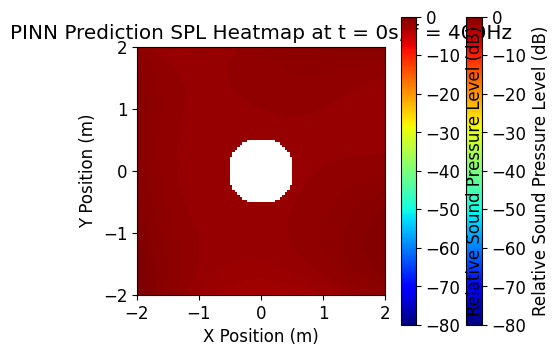

In [33]:

# 显示当前重建结果
sampler.compare_fields()

# %% [markdown]
# ## 5. 继续采样过程

# %%
# 继续采样剩余的点

sampler.source.update_params(no_plot = True)

for i in range(1, n_points):
    next_point = sampler.select_next_point()
    value = sampler.measure_point(next_point)
    sampler.train_model()
    
    if (i + 1) % 20 == 0:  # 每5个点显示一次结果
        print(f"\n完成 {i+1}/{n_points} 个点的采样")
        sampler.compare_fields()

# %% [markdown]
# ## 6. 分析结果（可选）

# %%
# 获取所有采样点位置
measured_points = np.array(sampler.measured_points)
print("\n采样点位置:")
print(measured_points[:, :2])  # 只显示x,y坐标

# 获取所有测量值
measured_values = np.array(sampler.measured_values)
print("\n测量值幅值:")
print(np.abs(measured_values))



Current parameters:
c: 343
omega: 2513.2741228718346
k: 7.327329804291063
freq: 400
radius: 0.5
amp: 1.0
loc: [0, 0, 0]
t: 0
max_order: 10
no_plot: False

Generating heat map for True Field
Current parameters: {'c': 343, 'omega': 2513.2741228718346, 'k': 7.327329804291063, 'freq': 400, 'radius': 0.5, 'amp': 1.0, 'loc': [0, 0, 0], 't': 0, 'max_order': 10, 'no_plot': False}

Generating heat map for PINN Prediction
Current parameters: {'freq': 400, 'radius': 0.5, 'amp': 1.0, 'loc': [0, 0, 0], 't': 0, 'max_order': 10}


d:\Git\PINN-LiDAR\scripts\vis.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  full_pressure[mask] = pressure


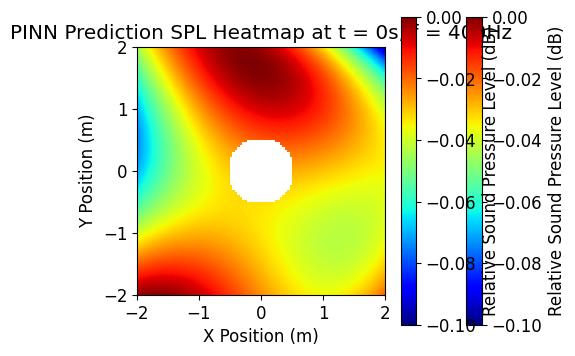

In [38]:

sampler.source.update_params(no_plot = False)
# 可视化最终结果
sampler.compare_fields(db_range=(-0.1, 0))


Generating heat map for Original Sound Field
Current parameters: {'c': 343, 'omega': 2513.2741228718346, 'k': 7.327329804291063, 'freq': 400, 'radius': 0.5, 'amp': 1.0, 'loc': [0, 0, 0], 't': 0, 'max_order': 10}


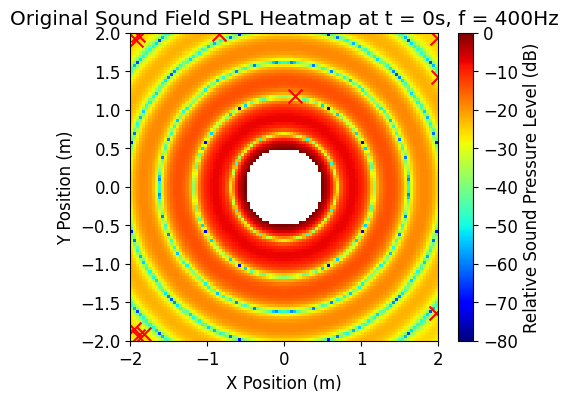

In [39]:
# 显示原始声场和采样点
plt.figure(figsize=(5,4))
Avis.create_heat_map(source, grid_params, t=0, title="Original Sound Field")
plt.scatter(measured_points[:, 0], measured_points[:, 1], 
           c='red', marker='x', s=100)
plt.draw()